In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
# from haversine import haversine, Unit
from scipy.stats import skew, kurtosis
sns.set() 
%matplotlib inline 
import warnings
warnings.filterwarnings(action='ignore')

# Dataset and Preprocessing

1. Loading Dataset
2. Dataset overview
3. Checking for missing values
4. Checking for null values across all columns
5. Checking unique values across all columns
6. Converting to needed datatypes 
7. Extracting month, day, time of day variables from the given data

In [75]:
df = pd.read_csv("nyc_taxi_trip_duration.csv")

In [76]:
df.shape

(729322, 11)

In [77]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [78]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [80]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [81]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [82]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [83]:
df.describe(include=object)

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
count,729322,729322,729322,729322
unique,729322,709359,709308,2
top,id0658763,2016-01-06 09:06:01,2016-02-19 19:25:04,N
freq,1,4,4,725282


In [84]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)
df['vendor_id'] = df['vendor_id'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

In [85]:
df['pickup_by_month'] = df['pickup_datetime'].dt.month
df['dropoff_by_month'] = df['dropoff_datetime'].dt.month
df['pickup_by_weekday'] = df['pickup_datetime'].dt.weekday
df['dropoff_by_weekday'] = df['dropoff_datetime'].dt.weekday
df['pickup_by_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_by_day'] = df['dropoff_datetime'].dt.day_name()
df['pickup_by_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_by_hour'] = df['dropoff_datetime'].dt.hour

In [88]:
hour_bins = [0, 6, 12, 16, 23, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening', 'Night']
df['Session'] = pd.cut(df.pickup_by_hour, bins=hour_bins, right=False, labels=labels, ordered=False)

In [89]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_by_month,dropoff_by_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_day,dropoff_by_day,pickup_by_hour,dropoff_by_hour,Session
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2,2,0,0,Monday,Monday,16,16,Evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,3,3,4,4,Friday,Friday,23,23,Night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2,2,6,6,Sunday,Sunday,17,18,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,1,1,1,Tuesday,Tuesday,9,10,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,2,2,2,Wednesday,Wednesday,6,6,Morning


# Univariate Analysis 

1. trip_duration
2. vendor_id
3. passenger_count
4. pickup_by_day
5. dropoff_by_day

In [8]:
df['trip_duration(min)'] = df['trip_duration']/60.0
df['trip_duration(min)'].describe()

count    729322.000000
mean         15.870486
std          64.410437
min           0.016667
25%           6.616667
50%          11.050000
75%          17.916667
max       32328.933333
Name: trip_duration(min), dtype: float64

In [9]:
pd.cut(df['trip_duration(min)'],bins=100).value_counts()

(-32.312, 323.306]        728310
(1293.173, 1616.462]         929
(323.306, 646.595]            41
(969.884, 1293.173]           22
(646.595, 969.884]            19
                           ...  
(20690.523, 21013.812]         0
(21013.812, 21337.102]         0
(21337.102, 21660.391]         0
(21660.391, 21983.68]          0
(15841.186, 16164.475]         0
Name: trip_duration(min), Length: 100, dtype: int64

In [34]:
df['trip_duration'].describe().round(2)

count     729322.00
mean         952.23
std         3864.63
min            1.00
25%          397.00
50%          663.00
75%         1075.00
max      1939736.00
Name: trip_duration, dtype: float64

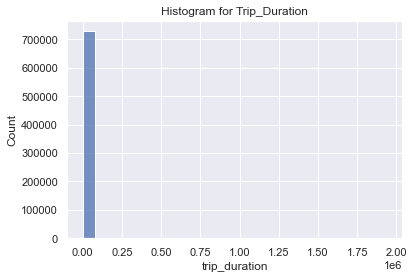

In [36]:
plt.title('Histogram for Trip_Duration')
sns.histplot(df['trip_duration'], kde=False, bins=25)
plt.show()

<AxesSubplot:title={'center':'Boxplot for Trip_Duration'}, xlabel='trip_duration'>

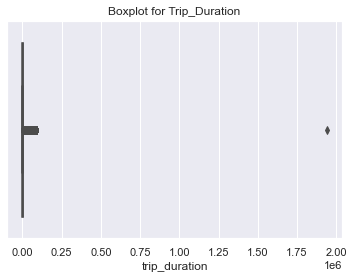

In [37]:
plt.title('Boxplot for Trip_Duration')
sns.boxplot(x = df['trip_duration'])

In [38]:
df[df['trip_duration'] == df['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_by_month,dropoff_by_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_day,dropoff_by_day,pickup_by_hour,dropoff_by_hour,Session
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,1939736,1,1,1,2,Tuesday,Wednesday,0,11,Night


In [39]:
df.drop(df[df['trip_duration'] == 1939736.00].index, inplace = True)

In [40]:
df[df['trip_duration'] == df['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_by_month,dropoff_by_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_day,dropoff_by_day,pickup_by_hour,dropoff_by_hour,Session
259437,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,86391,5,6,1,2,Tuesday,Wednesday,13,13,Afternoon


In [41]:
df['vendor_id'].describe()

count     729321
unique         2
top            2
freq      390481
Name: vendor_id, dtype: int64

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

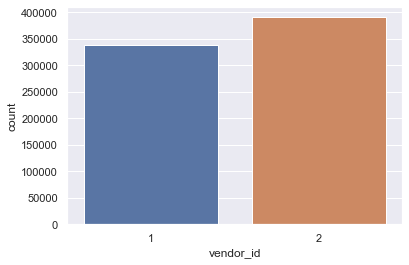

In [42]:
sns.countplot(x='vendor_id', data=df)

In [43]:
df['passenger_count'].describe()

count    729321.000000
mean          1.662056
std           1.312446
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: passenger_count, dtype: float64

In [44]:
df.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

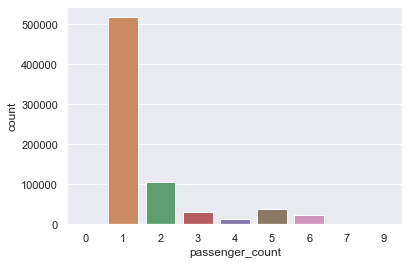

In [45]:
sns.countplot(x = 'passenger_count', data=df)

In [46]:
df['pickup_by_day'].describe(include=object)

count     729321
unique         7
top       Friday
freq      111744
Name: pickup_by_day, dtype: object

In [47]:
df['dropoff_by_day'].describe(include=object)

count     729321
unique         7
top       Friday
freq      111509
Name: dropoff_by_day, dtype: object

<AxesSubplot:xlabel='pickup_by_day', ylabel='count'>

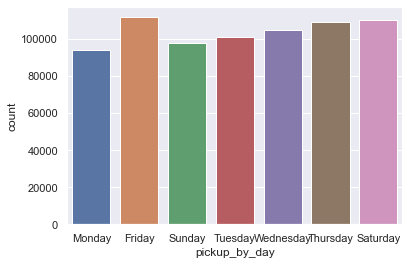

In [48]:
sns.countplot(x = 'pickup_by_day', data=df)

<AxesSubplot:xlabel='dropoff_by_day', ylabel='count'>

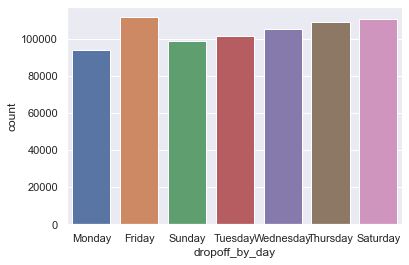

In [49]:
sns.countplot(x = 'dropoff_by_day', data=df)

# Bivariate Analysis

1. vendor_id, trip_duration
2. passenger_count, trip_duration
3. pickup_by_day, trip_duration
4. dropoff_by_day, trip_duration
5. Session, trip_duration
6. pickup_by_hour, trip_duration

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

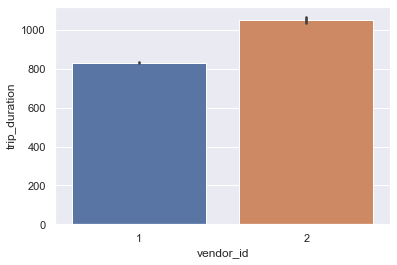

In [51]:
sns.barplot(x='vendor_id', y='trip_duration', data=df)

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

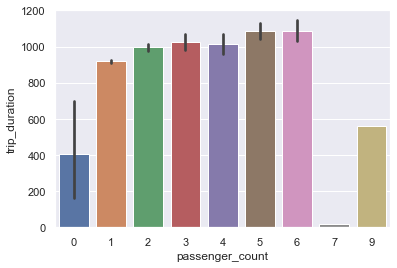

In [52]:
sns.barplot(x='passenger_count',y='trip_duration', data=df)

<AxesSubplot:xlabel='pickup_by_day', ylabel='trip_duration'>

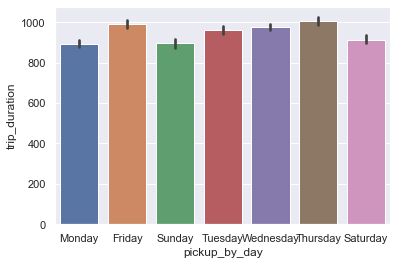

In [53]:
sns.barplot(x="pickup_by_day", y='trip_duration', data=df)

<AxesSubplot:xlabel='dropoff_by_day', ylabel='trip_duration'>

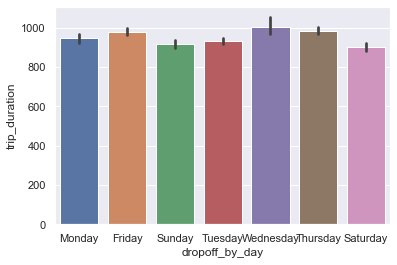

In [91]:
sns.barplot(x="dropoff_by_day", y='trip_duration', data=df)

<AxesSubplot:xlabel='Session', ylabel='trip_duration'>

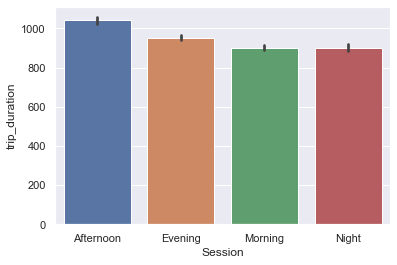

In [57]:
sns.barplot(x="Session", y='trip_duration', data=df)

<AxesSubplot:xlabel='pickup_by_hour', ylabel='trip_duration'>

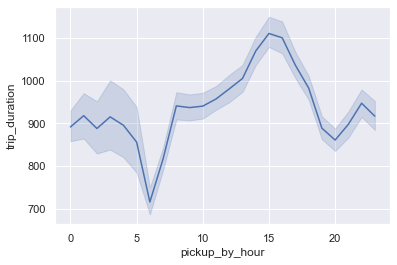

In [58]:
sns.lineplot(x='pickup_by_hour', y='trip_duration', data=df)

In [59]:
corr =df.corr()

# Multivariate Analysis

<AxesSubplot:>

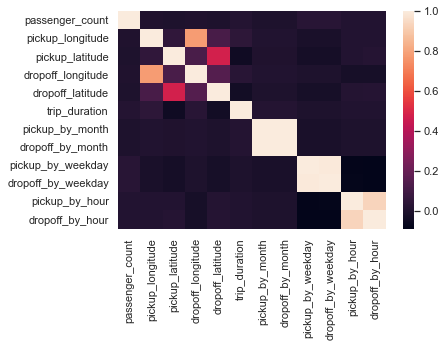

In [60]:
sns.heatmap(corr)